In [6]:
# !pip install diffusers torch transformers

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

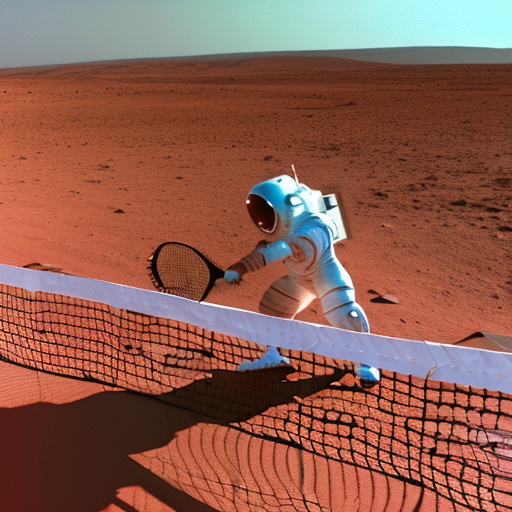

In [23]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id,
                                                   subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(model_id, 
                                               scheduler=scheduler,
                                               revision="fp16",
                                               torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut playing tennis on mars"
image = pipe(prompt, height=512, width=512).images[0]
    
image.save('astronaut_playing_tennis.png')